##CLASSES

**Class point**

Every point *p* is identified by:
1.    coords x,y
2.    the mark he has, that can be border, noise or core
3.    the cluster in which *p* is assigned

In [ ]:
class point:
  def __init__(self,x,y):
    self.x = x
    self.y = y
    self.markedas = 'unknown'
    self.cluster = 0
  
  def get_x(self):
    return self.x 

  def get_y(self):
    return self.y

  def set_mark(self,mark):
    self.markedas = mark

  def get_mark(self):
    return self.markedas

  def set_cluster(self,c):
    self.cluster = c

  def get_cluster(self):
    return self.cluster


**Class Cell**

Every cell *c* is identified by:
1.    A set of points that belong to *c*
2.    A cluster number 
3.    A boolean value used to determine if *c* contains core points

In [ ]:
class cell:
  def __init__(self):
    self.iscore = False
    self.points = []
    self.cluster = 0
  
  def get_points(self):
    return self.points
  
  def get_cluster(self):
    return self.cluster

  def set_cluster(self,cluster):
    self.cluster = cluster
  
  def add_point(self,p):
    self.points.append(p)
  
  def set_core(self,tf):
    self.iscore = tf 

  def get_core(self):
    return self.iscore

  def set_cluster_to_point(self):
    for p in self.points:
      p.set_cluster(self.get_cluster())

  def set_cluster_to_point1(self,n):
    for p in self.points:
      p.set_cluster(n)

##UTILITIES

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from time import time
# Library for generating datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

**calculateDistance**

Returns the Euclidean distance between two points

In [ ]:
def calculateDistance(x1,y1,x2,y2):  
  dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
  return dist

**Search_max**

Returns the maximum value in a list. It's used to calculate both the maximum *y* and *x*

In [ ]:
def search_max(points,xy):
  max = 0
  if xy == 1:
    for point in range(0,len(points)):
      if point == 0:
        max = points[point].get_x()
      else:
        if points[point].get_x() > max:
          max = points[point].get_x()
  else:
    for point in range(0,len(points)):
      if point == 0:
        max = points[point].get_y()
      else:
        if points[point].get_y() > max:
          max = points[point].get_y()
  return max


**Search_min**

Returns the minimum value in a list. It's used to calculate both the minimum *y* and *x*

In [ ]:
def search_min(points,xy):
  min = 0
  if xy == 1:
    for point in range(0,len(points)):
      if point == 0:
        min = points[point].get_x()
      else:
        if points[point].get_x() < min:
          min = points[point].get_x()
  else:
    for point in range(0,len(points)):
      if point == 0:
        min = points[point].get_y()
      else:
        if points[point].get_y() < min:
          min = points[point].get_y()
  return min

**plot_cluster**

input:
1.    the clustered points *my_labels*

The function plots all the clustered point.

In [ ]:
def plot_clusters(my_labels): 
  x_coordinates = [i.get_x() for i in my_labels]
  y_coordinates = [i.get_y() for i in my_labels]
  cluster_labels = [i.get_cluster() for i in my_labels]
  plt.scatter(x_coordinates, y_coordinates, c=cluster_labels, cmap = 'jet')
  plt.figure()

##LOAD FUNCTIONS

**Load_points**

Adds points to a list

In [ ]:
def load_points(l):
  points_list = []
  for row in range(0,len(l)):
    p = point(l[row][0],l[row][1])
    points_list.append(p)
  return points_list

**Import_from_file**

This function is used to import data from your Google Drive account. Like written in the report, you should import data to your google drive before launch the script.

In [ ]:
#!pip install -U -q PyDrive
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


link = 'https://drive.google.com/open?id=1GEKPhfZFPYsf1OE3qIq9Px8Akg8Xi8tU' #Paste the URL here
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df3 = pd.read_csv('Filename.csv',header = None,sep='\t')
points_list_from_file = df3.values.tolist()

1GEKPhfZFPYsf1OE3qIq9Px8Akg8Xi8tU


**Alternatively**, here there is a set of points that it can be used to simuluate the algorythm

In [ ]:
p1a = point(0.8,0.8)
p1b = point(1.7,1.9)
p1c = point(1,1)
p1d = point(1.3,1.3)
p1e = point(1.5,1.5)
p3a = point(18,18)
p3b = point(19.5,19)
p3c = point(18.7,18.3)
p3d = point(18.1,19)
p7c = point(7.6,9.3)
ps_si = [p1a,p1b,p1c,p3a,p3b,p3c,p3d,p1d,p1e,p7c]

In [ ]:
ps = load_points(points_list_from_file)
#ps = ps_si

##CLUSTERING STEPS

**Retrieve cluster**

input: 
1.   Grid G
2.   The coords of the cell we are looking at row,box
3.   The coords of the other cell r,c
4.   The current number of the cluster to insert

This function;

For every point p inside the cell in row,box: assign p to a specific cluster considering the neighbor points cluster assignment.  



In [ ]:
def retrieve_cluster(G,row,box,r,c,cluster_number):
  pts_in_cell = G[row][box].get_points()
  neigh_pts = G[r][c].get_points()
  # for every point of the in-cell
  for p in pts_in_cell:
    # if the point is a core
    if p.get_mark() == 'core':
      # for every neighbor point
      for n_p in neigh_pts:
        # if it's a core 
        if n_p.get_mark() == 'core':
          # if the distance between the 2 points is equal or less than epsilon
          if calculateDistance(p.get_x(),p.get_y(),n_p.get_x(),n_p.get_y()) <= eps:
            # because the distance is less than epsilon, i can merge the two cells
            # if the two cells are unclustered
            if G[row][box].get_cluster() == 0 and G[r][c].get_cluster() == 0:
              G[row][box].set_cluster(cluster_number)
              G[r][c].set_cluster(cluster_number)
              G[row][box].set_cluster_to_point()
              return
            elif G[row][box].get_cluster() == 0 and G[r][c].get_cluster() != 0:
              G[row][box].set_cluster(G[r][c].get_cluster())
              G[row][box].set_cluster_to_point()
              return
            elif G[row][box].get_cluster() != 0 and G[r][c].get_cluster() == 0:
              G[r][c].set_cluster(G[row][box].get_cluster())
              G[r][c].set_cluster_to_point()
              return
            elif G[row][box].get_cluster() != 0 and G[r][c].get_cluster() != 0:
              #print("hereeee")
              for pt in ps:
                if pt.get_cluster() == G[r][c].get_cluster():
                  pt.set_cluster(G[row][box].get_cluster())
              G[r][c].set_cluster(G[row][box].get_cluster())
              G[r][c].set_cluster_to_point()
              return

**Merge Cluster**

input: grid and a parameter for the cluster's number

This function merge two different cluster that are in neighbor cells 

In [ ]:
def merge_cluster(G,cluster_number):
  # for each row
  for row in range(0,len(G)):
    if G[row]:
      # for every cell
      for box in range(0,len(G[row])):
        # if it has points inside
        if len(G[row][box].get_points()) > 0:
          # if the cell is marked as core
          if G[row][box].get_core() == True:
            # check the neighbor cell without checking itself
            for r in range(row -1, row + 2):
              for c in range(box -1, box + 2):
                # if a neighbor cell is a core as well maybe i have to merge the 2 cells
                if G[r][c].get_core() == True:
                  retrieve_cluster(G,row,box,r,c,cluster_number)
          cluster_number = cluster_number + 1

**determine_core_pts**

input:
1.    grid G
2.    epsilon eps
3.    minpts minpts

For every cell *c* in *G* the function checks if *c* has at least *min_pts* and, if so, *c* becomes a core cell. Otherwise for every point *p* inside *c* it checks if they deserve to become core points.

In [ ]:
def determine_core_pts(G,eps,minpts):
  # for every row
  for row in range(0,len(G)):
    # if the row is not empty
    if G[row]:
      for box in range(0,len(G[row])):
        # prevent the alg to access void cells
        if len(G[row][box].get_points()) > 0:
          if len(G[row][box].get_points()) >= minpts:
            #the cell is filled with core points
            G[row][box].set_core(True)
            for p in G[row][box].get_points():
              p.set_mark('core')
          else:
            # the points that belong to the neighour cells
            points_in_neigh_cells = neighbour_cells(G,row,box) 
            for point in G[row][box].get_points():
              neigh_points = 0
              # for every potentially neighbour point
              for poss_neigh in points_in_neigh_cells:
                # if it's closer than eps
                if calculateDistance(point.get_x(),point.get_y(),poss_neigh.get_x(),poss_neigh.get_y()) <= eps:
                  # i found a neighbour point so i add 1 to the counter
                  neigh_points = neigh_points + 1
                  # if i have at least minpts neigbours
                  if neigh_points >= minpts:
                    point.set_mark('core')
                    G[row][box].set_core(True)
                    # i dont have to check all the other points, now i know that 'point' is a core 
                    break
              
  

**constructGrid**

input:
1.    A list of points *points*
2.    Epsilon value *eps*

Output:
*    A grid *G*



Creates the initial grid and assign each point to the corresponding cell. Every cell's width is the squared root of *eps*

In [ ]:
def constructGrid(points,eps):
  cell_width = eps/math.sqrt(2)
  xmax = search_max(points,1)
  ymax = search_max(points,2)
  xmin = search_min(points,1)
  ymin = search_min(points,2)
  nrows = math.floor((xmax - xmin)/cell_width + 1) + 4
  ncols = math.floor((ymax - ymin)/cell_width + 1) + 4
  G = [ [ cell() for y in range( ncols ) ] for x in range( nrows ) ]
  for p in points:
    G[math.floor((p.get_x() - xmin)/ cell_width + 2)][math.floor( (p.get_y() - ymin)/cell_width + 2)].add_point(p) 
  return G

**Neighbour_cells**

input:
1.    A grid *G*
2.    Cell's coord *row,box*

Output:
*    A list of neighbor points 

Retrieves all the points inside the neighbor cells


In [ ]:
def neighbour_cells(G,row,box):
  tot_pts = []
  for r in range(row -2, row + 3):
    for c in range(box-2, box + 3):
      # we dont want the angles of the outer square
      if not((r == row-2 and c == box - 2)  or ( r == row -2 and c == box + 2) or (r == row + 2 and c == box - 2) or (r == row + 2 and c == box + 2)):
        tot_pts = tot_pts + G[r][c].get_points()
  return tot_pts

**DetermineBorderPoint**
input:
1.    The grid *G*

Detect border point that could be reached froma cluster. If a point cannot be reached, than it's marked as noise, otherwise is a border point

In [ ]:
def DetermineBorderPoint(G):
  # for each row
  for row in range(0,len(G)):
    if G[row]:
      #for each col
      for box in range(0,len(G[row])):
        #if there are some points
        if len(G[row][box].get_points()) > 0:
          # for every point inside the cell
          for p in G[row][box].get_points():
            # if the point is not a core
            q = None
            if p.get_mark != 'core':
              # for every neighbor cell
              for r in range(row-1,row+2):
                for c in range(box-1,box+2):
                  # if we are not consider the current cell
                  if c == box and r == row:
                    continue
                  else:
                    # find the closest core point to p
                    tpoint = NearestCorePoint(G,p,r,c)
                    # if the cell has no core point
                    if tpoint == None:
                      continue
                    # if q is still empty and we find a core point that is eps close to our point:
                    elif q == None and calculateDistance(tpoint.get_x(), tpoint.get_y(), p.get_x(), p.get_y()) <= eps:
                      q = tpoint
                    elif q != None:
                      # if the distance between q and our p is bigger than the one with the new core
                      if calculateDistance(q.get_x(),q.get_y(),p.get_x(),p.get_y()) > calculateDistance(tpoint.get_x(),tpoint.get_y(),p.get_x(),p.get_y()):
                        q = tpoint
              # if we found a value for q
              if q != None:
                if p.get_mark() != 'core':
                  # our point is assigned to the same cluster as q
                  p.set_cluster(q.get_cluster())
                  p.set_mark('Border')
              else:
                if p.get_mark() != 'core':
                  # otherwise p is noise
                  p.set_mark('Noise')




**NearestCorePoint**

input:
1.    the Grid *G*
2.    a point *p*
3.    the coords of the cell in which we want to look for the nearest *p'*

Output:
1.    the nearest point *p'* to *p* that is stored in a neighbor cell

Among all the points that are inside a neighbor cell, this function returns the nearest to *p*

In [ ]:
def NearestCorePoint(G,p,r,c):
  res = None
  dist = None
  # for every point inside the cell (if the cell is not empty)
  if len(G[r][c].get_points()) > 0:
    for ptemp in G[r][c].get_points():
      # if a point is marked as core
      if ptemp.get_mark() == 'core':
        # if it is the first time we find a core
        if dist == None:
          res = ptemp
          dist = calculateDistance(ptemp.get_x(),ptemp.get_y(),p.get_x(),p.get_y())
        else:
          # if the distance of the new core point is less than the previous one
          if dist > calculateDistance(ptemp.get_x(),ptemp.get_y(),p.get_x(),p.get_y()):
            # the new point is the closest
            res = ptemp
            dist = calculateDistance(ptemp.get_x(),ptemp.get_y(),p.get_x(),p.get_y())
  # return the closest point
  return res

##MAIN PROGRAM

The time (in second) spent to produce the cluster is:  
0.13937735557556152




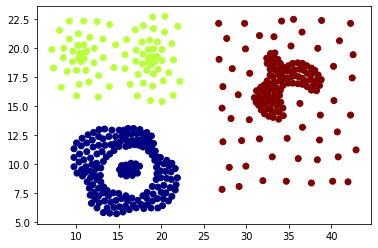

<Figure size 432x288 with 0 Axes>

In [ ]:
eps = 2.5
min_pts = 4
cluster_number = 1

start = time()
Gt = constructGrid(ps,eps)
determine_core_pts(Gt,eps,min_pts)
merge_cluster(Gt,cluster_number)
DetermineBorderPoint(Gt)
end = time()

print('The time (in second) spent to produce the cluster is:  ')
print(end - start)
print('')
print('')
plot_clusters(ps)

##FURTHER EXAMPLES

In [ ]:
# Configuring Google Drive file loading (run it only once)
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

The time (in second) spent to produce the cluster is:  
0.1888570785522461




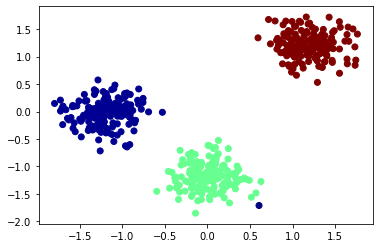

<Figure size 432x288 with 0 Axes>

In [ ]:
# Dataset: Compound
centers = [[2, 2], [-2, -0], [0, -2]]
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
ps = []

for i in X:
  ps.append(point(i[0], i[1]))

eps = 0.3
min_pts = 10
cluster_number = 1

start = time()
Gt = constructGrid(ps,eps)
determine_core_pts(Gt,eps,min_pts)
merge_cluster(Gt,cluster_number)
DetermineBorderPoint(Gt)
end = time()

print('The time (in second) spent to produce the cluster is:  ')
print(end - start)
print('')
print('')
plot_clusters(ps)

The time (in second) spent to produce the cluster is:  
0.141754150390625




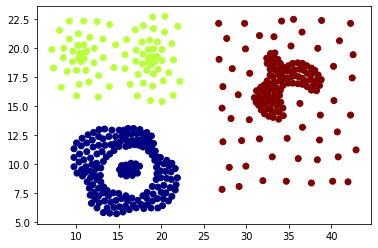

<Figure size 432x288 with 0 Axes>

In [ ]:
# Dataset: Compound
link = 'https://drive.google.com/open?id=1GEKPhfZFPYsf1OE3qIq9Px8Akg8Xi8tU'
id = link.split('=')[1]

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(id)  
df3 = pd.read_csv(id, sep='\t', header=None)# Dataset is now stored in a Pandas Dataframe
ps = []
for index, row in df3.iterrows():
  ps.append(point(row[0], row[1]))

eps = 2.5
min_pts = 4
cluster_number = 1

start = time()
Gt = constructGrid(ps,eps)
determine_core_pts(Gt,eps,min_pts)
merge_cluster(Gt,cluster_number)
DetermineBorderPoint(Gt)
end = time()

print('The time (in second) spent to produce the cluster is:  ')
print(end - start)
print('')
print('')
plot_clusters(ps)

The time (in second) spent to produce the cluster is:  
0.11816859245300293




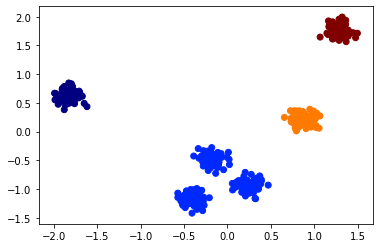

<Figure size 432x288 with 0 Axes>

In [ ]:
# Dataset: Custom2
centers = [[3, 3], [-2, -0], [0, -2], [-3, -3], [-10, 5], [5, 10]]
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
ps = []

for i in X:
  ps.append(point(i[0], i[1]))

eps = 0.3
min_pts = 10
cluster_number = 1

start = time()
Gt = constructGrid(ps,eps)
determine_core_pts(Gt,eps,min_pts)
merge_cluster(Gt,cluster_number)
DetermineBorderPoint(Gt)
end = time()

print('The time (in second) spent to produce the cluster is:  ')
print(end - start)
print('')
print('')
plot_clusters(ps)

The time (in second) spent to produce the cluster is:  
0.05465507507324219




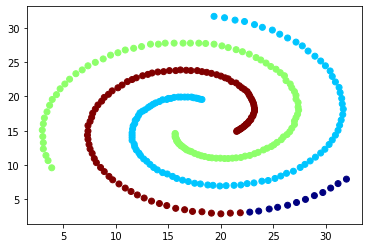

<Figure size 432x288 with 0 Axes>

In [ ]:
# Dataset: Spiral
link = 'https://drive.google.com/open?id=125f8qgJ9704eGuG1NRzpJcJOLsNPFrfP'
id = link.split('=')[1]

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(id)  
df3 = pd.read_csv(id, sep='\t', header=None)# Dataset is now stored in a Pandas Dataframe
ps = []
for index, row in df3.iterrows():
  ps.append(point(row[0], row[1]))

eps = 3
min_pts = 3
cluster_number = 1

start = time()
Gt = constructGrid(ps,eps)
determine_core_pts(Gt,eps,min_pts)
merge_cluster(Gt,cluster_number)
DetermineBorderPoint(Gt)
end = time()

print('The time (in second) spent to produce the cluster is:  ')
print(end - start)
print('')
print('')
plot_clusters(ps)

The time (in second) spent to produce the cluster is:  
0.18431329727172852




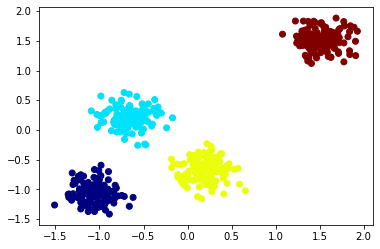

<Figure size 432x288 with 0 Axes>

In [ ]:
# Dataset: Custom2
centers = [[3, 3], [-2, -0], [0, -2], [-3, -3]]
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
ps = []

for i in X:
  ps.append(point(i[0], i[1]))

eps = 0.3
min_pts = 10
cluster_number = 1

start = time()
Gt = constructGrid(ps,eps)
determine_core_pts(Gt,eps,min_pts)
merge_cluster(Gt,cluster_number)
DetermineBorderPoint(Gt)
end = time()

print('The time (in second) spent to produce the cluster is:  ')
print(end - start)
print('')
print('')
plot_clusters(ps)

The time (in second) spent to produce the cluster is:  
0.5695116519927979




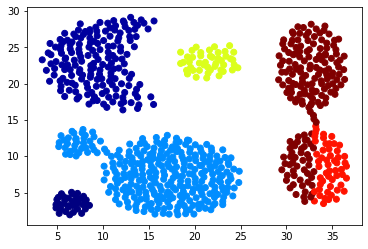

<Figure size 432x288 with 0 Axes>

In [ ]:
# Dataset: Aggregation
link = 'https://drive.google.com/open?id=1PO_jiPoj6SjFtscC0YCJyrCRtAeFqmOo'
id = link.split('=')[1]

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(id)  
df3 = pd.read_csv(id, sep='\t', header=None)# Dataset is now stored in a Pandas Dataframe
ps = []
for index, row in df3.iterrows():
  ps.append(point(row[0], row[1]))

eps = 2
min_pts = 4
cluster_number = 1

start = time()
Gt = constructGrid(ps,eps)
determine_core_pts(Gt,eps,min_pts)
merge_cluster(Gt,cluster_number)
DetermineBorderPoint(Gt)
end = time()

print('The time (in second) spent to produce the cluster is:  ')
print(end - start)
print('')
print('')
plot_clusters(ps)

##DEBUG FUNCTIONS

In [ ]:
def printGrid(G):
  for row in range(0,len(G)):
    for col in range(0,len(G[row])):
      if len(G[row][col].get_points()) > 0:
        print('X:  ' + str(row) + '   Y:' + str(col))
        for p in G[row][col].get_points():
          print(str(p.get_x()) + '   ' + str(p.get_y()))
        print('\n')